In [1]:
import numpy as np
import matplotlib.pyplot as plt

# LIBRERÍA FUZZY

#
# Función singleton(x, x0): función de pertenencia singleton.
# Argumentos:
#   x: int, float, numpy.ndarray
#      Contiene los valores de x en el universo de discurso
#      para los cuales se evalúa su valor de pertenencia.
#   x0: valor de referencia.
# Retorna:
#   singleton(x, x0): float, si x es int, float.
#   singleton(x, x0): numpy.ndarray: si x es numpy.ndarray
#   -1 si no es posible calcular el valor
#
def singleton(x, x0):
    if (type(x) is int) or (type(x) is float) or (type(x) is np.float64):
    # Si X es entero o real evalua para el valor entrante.
        if x == x0:
            m = 1.0
        else:
            m = 0.0
        return m
    elif (type(x) is numpy.ndarray):
    # Si es un arreglo, evalua para todos sus elementos.
        m = np.zeros(x.size)
        for i in range(x.size):
            if x[i] == x0:
                m[i] = 1.0
            else:
                m[i] = 0.0
        return m
    else:
        return -1
    
#
# Función trimf(x, param): función de pertenencia triangular.
# Argumentos:
#   x: int, float, numpy.ndarray
#      Contiene los valores de x en el universo de discurso
#      para los cuales se evalúa su valor de pertenencia.
#   param = [a, b, c]: list, numpy.ndarray
#      contiene los parámetros de la función de pertenencia
#      debe cumplirse a <= b <= c
# Retorna:
#   valor de pertencia de x según función de membresía triangular.
#   trimf(x, param): float, si x es int, float.
#   trimf(x, param): numpy.ndarray: si x es numpy.ndarray
#   -1 si no es posible calcular el valor
#
def trimf(x, param):
    # param = [a, b, c]
    # a <= b <= c
    a = float(param[0])
    b = float(param[1])
    c = float(param[2])
    if (a <= b) and (b <= c):
        if (type(x) is int) or (type(x) is float) or (type(x) is np.float64):     
            if x <= a:
                m = 0.0
            elif (a <= x) and (x <= b):
                m = (x - a)/(b - a)   
            elif (b <= x) and (x <= c):
                m = (c - x)/(c - b)  
            else:
                m = 0.0 
            return m
        else: 
            m = np.zeros(x.size)
            for i in range(x.size):
                if x[i] <= a:
                    m[i] = 0.0
                elif (a <= x[i]) and (x[i] <= b):
                    m[i] = (x[i] - a)/(b - a)   
                elif (b <= x[i]) and (x[i] <= c):
                    m[i] = (c - x[i])/(c - b)  
                else:
                    m[i] = 0.0
        return m
    else:
        return -1

#
# Función trapmf(x, [a, b, c, d]): función de pertenencia trapezoidal.
# Argumentos:
#   x: int, float, numpy.ndarray
#      Contiene los valores de x en el universo de discurso
#      para los cuales se evalúa su valor de pertenencia.
#   [a, b, c, d]: list, numpy.ndarray
#      contiene los parámetros de la función de pertenencia
#      debe cumplirse a <= b <= c <= d
# Retorna:
#   valor de pertencia de x según función de membresía triangular.
#   trapmf(x, param): float, si x es int, float.
#   trapmf(x, param): numpy.ndarray: si x es numpy.ndarray
#   -1 si no es posible calcular el valor
#
def trapmf(x, param):
    # param = [a, b, c, d]
    # a <= b <= c <=d
    a = float(param[0])
    b = float(param[1])
    c = float(param[2])
    d = float(param[3])
    if (a <= b) and (b <= c) and (c <= d):
        if (type(x) is int) or (type(x) is float) or (type(x) is np.float64):    
            if x < a:
                m = 0.0
            elif (a <= x) and (x < b):
                m = (x - a)/(b - a)   
            elif (b <= x) and (x <= c):
                m = 1.0  
            elif (c < x) and (x <= d):
                m = (d - x)/(d - c)  
            else:
                m = 0.0
            return m
        else: 
            m = np.zeros(x.size)
            for i in range(x.size):
                if x[i] < a:
                    m[i] = 0.0
                elif (a <= x[i]) and (x[i] < b):
                    m[i] = (x[i] - a)/(b - a)   
                elif (b <= x[i]) and (x[i] <= c):
                    m[i] = 1.0
                elif (c < x[i]) and (x[i] <= d):
                    m[i] = (d - x[i])/(d - c)  
                else:
                    m[i] = 0.0
            return m
    else:
        return -1

#
# Función gaussmf(x, param): función de pertenencia gaussiana.
# Argumentos:
#   x: int, float, numpy.ndarray
#      Contiene los valores de x en el universo de discurso
#      para los cuales se evalúa su valor de pertenencia.
#   param = [sig, x0]: list, numpy.ndarray
#      contiene los parámetros de la función de pertenencia
#      debe cumplirse sig > 0
# Retorna:
#   valor de pertencia de x según función de membresía triangular.
#   gaussmf(x, param): float, si x es int, float.
#   gaussmf(x, param): numpy.ndarray: si x es numpy.ndarray
#   -1 si no es posible calcular el valor
#
def gaussmf(x, param):
    #param = [sig, x0]
    # sig > 0
    sig = param[0]
    x0 = param[1]
    if (sig > 0):
        if (type(x) is int) or (type(x) is float) or (type(x) is np.float64):     
            m = np.exp(-0.5*((x - x0)/sig)**2)
        else: 
            m = np.zeros(x.size)
            for i in range(x.size):
                m[i] = np.exp(-0.5*((x[i] - x0)/sig)**2)
        return m
    else:
        return -1

#
# Función gbellmf(x, param): función de pertenencia campana generalizada.
#   x: int, float, numpy.ndarray
#      Contiene los valores de x en el universo de discurso
#      para los cuales se evalúa su valor de pertenencia.
#   param = [a, b, x0]: list, numpy.ndarray
#      contiene los parámetros de la función de pertenencia
#      debe cumplirse a, b > 0
# Retorna:
#   valor de pertencia de x según función de membresía triangular.
#   gbellmf(x, param): float, si x es int, float.
#   gbellmf(x, param): numpy.ndarray: si x es numpy.ndarray
#   -1 si no es posible calcular el valor
#
def gbellmf(x, param):
    # param = [a, b, x0]
    # a, b > 0
    a = param[0]
    b = param[1]
    x0 = param[2]
    if (a > 0) and (b > 0):
        if (type(x) is int) or (type(x) is float):     
            m = 1/(1+(abs((x - x0)/a)**(2*b)))
        else: 
            m = np.zeros(x.size)
            for i in range(x.size):
                m[i] = 1/(1+(abs((x[i] - x0)/a)**(2*b)))
        return m
    else:
        return -1

#
# Función sigmf(): función de pertenencia sigmoidal.
#   x: int, float, numpy.ndarray
#      Contiene los valores de x en el universo de discurso
#      para los cuales se evalúa su valor de pertenencia.
#   param = [a, x0]: list, numpy.ndarray
#      contiene los parámetros de la función de pertenencia
# Retorna:
#   valor de pertencia de x según función de membresía triangular.
#   sigmf(x, param): numpy.float, si x es int, float.
#   sigmf(x, param): numpy.ndarray: si x es numpy.ndarray
#   -1 si no es posible calcular el valor
#
def sigmf(x, param):
    # param = [a, x0]
    a = param[0]
    x0 = param[1]
    if (type(x) is int) or (type(x) is float) or (type(x) is np.float64):    
        m = 1/(1+np.exp(-a*(x - x0)))
    else: 
        m = np.zeros(x.size)
        for i in range(x.size):
            m[i] = 1/(1+np.exp(-a*(x[i] - x0)))
    return m

#
# Función cartesian(): Relación cartesiana difusa.
# Argumentos:
#   mA: numpy.ndarray, Vector con valores de pertenencia de xA
#   mB: numpy.ndarray, Vector con valores de pertenencia de xB
# Retorna:
#   AxB: Matriz de relación (mínimo)
#
def cartesian(mA, mB):
    AxB = np.zeros([mA.size, mB.size])
    for i in range(mA.size):
        for j in range(mB.size):
            AxB[i, j] = min(mA[i], mB[j])
    return AxB

#
# Función compose(): Composición difusa max-min.
# Argumentos:
#   mRA: numpy.ndarray, vector o matriz de relación A
#   mRB: numpy.ndarray, Matriz de relación B
# Retorna:
#   AoB: Matriz de composición max-min
#
def compose(mRA, mRB):   
    
    if mRA.ndim == 1:
        aux = np.zeros(mRA.size)
        AoB = np.zeros(mRB.shape[0])
        
        for j in range(mRA.size):
            for i in range(mRB.shape[0]):
                aux[i] = min(mRA[i], mRB[i,j])
            AoB[j] = max(aux) 
        
    else:
        if (mRA.shape[1] != mRB.shape[0]):
            return -1
        else:
            aux = np.zeros(mRA.shape[1])
            AoB = np.zeros([mRA.shape[0], mRB.shape[1]])

            for i in range(mRA.shape[0]):
                for k in range(mRB.shape[1]):
                    for j in range(mRA.shape[1]):
                        aux[j] = min(mRA[i,j],mRB[j,k])

                    AoB[i, k] = max(aux)
    return AoB

#
# Función Tmin(): Norma T
# Argumentos:
#   mA: numpy.ndarray, Vector con valores de pertenencia de xA
#   mB: numpy.ndarray, Vector con valores de pertenencia de xB
# Retorna:
#   Tmin: Norma T (mínimo)
#
def Tmin(mA, mB):
    Tmin = np.zeros([mA.size])
    for i in range(mA.size):
        Tmin[i] = min(mA[i], mB[i])
    return Tmin

#
# Función Smax(): Norma S
# Argumentos:
#   mA: numpy.ndarray, Vector con valores de pertenencia de xA
#   mB: numpy.ndarray, Vector con valores de pertenencia de xB
# Retorna:
#   Tmin: Norma S (máximo)
#
def Smax(mA, mB):
    Smax = np.zeros([mA.size])
    for i in range(mA.size):
        Smax[i] = max(mA[i], mB[i])
    return Smax

#
# Función Nc(): Complemento
# Argumentos:
#   mA: numpy.ndarray, Vector con valores de pertenencia de xA
# Retorna:
#   Nc: Complemento
#
def Nc(mA):
    Nc = np.zeros([mA.size])
    for i in range(mA.size):
        Nc[i] = 1 - mA[i]
    return Nc

#
# Función cut(): cortar
# Argumentos:
#   mf: numpy.ndarray
#   value: Int, Float, valor de corte
# Retorna:
#   numpy.ndarray: función cortada
#
def cut(value, mf):
    value = float(value)
    aux = np.zeros(mf.size)
    if (type(value) is int) or (type(value) is float):
        for i in range(mf.size):
            aux[i] = min(value, mf[i])
        return aux
    else:
        return -1

    
#
# Función union(): Unión de funciones de membresía por método max
# Argumentos:
#   data: arreglo de elementos numpy.ndarray, todos de igual dimensión
# Retorna:
#   numpy.ndarray: unión de las funciones
#
def union(data):
    aux = np.zeros(data[0].size)
    for j in range(len(data)):
        for i in range(aux.size):
            aux[i] = max(aux[i], data[j][i])
    return aux

#
# Función fuzz(): fuzzificación
# Argumentos:
#   x0: Int, Float, valor de entrada
#   y: numpy.ndarray, universo de discurso de salida
#   mA_list: arreglo de reglas de entrada
#   mB_list: arreglo de reglas de salida
# Retorna:
#   numpy.ndarray
def fuzz(x0, y, mA_list, mB_list):
    A0 = np.zeros(len(mA_list))
    Bi = np.zeros([y.size, len(mA_list)])
    out = np.zeros(y.size)
    for i in range(len(mA_list)):
        fA = mA_list[i][0]
        param_A = mA_list[i][1]
        A0[i] = fA(float(x0), param_A)
        fB = mB_list[i][0]
        param_B = mB_list[i][1]
        for j in range(y.size):
            Bi[j,i] = min(A0[i], fB(float(y[j]), param_B))
            out[j] = max(Bi[j,:])
    return(out)


#
# Función defuzz(): Defuzzificación
# Argumentos:
#   y: numpy.ndarray, universo de discurso de salida
#   mf: función resultante del proceso de fuzzificación
#   option: String, método de defuzzificación
# Retorna:
#   Float: valor de salida
def defuzz(y, mf, option):
    if option == 'centroid':
        num = 0
        den = 0
        for i in range(y.size):
            num = num + y[i]*mf[i]
            den = den + mf[i]
        y0 = num/den
        return y0
    
    elif option == 'bisector':
        area = 0
        aux = 0
        for i in range(y.size - 1):
            area = area + (y[i+1] - y[i]) * ((mf[i+1] + mf[i])/2)
        for i in range(y.size):
            aux = aux + (y[i+1] - y[i]) * ((mf[i+1] + mf[i])/2)
            if (aux >= area/2):
                return y[i]
        
    elif option == 'MOM':
        mf_max = max(mf)
        acum = 0
        n = 0
        for i in range(y.size):
            if (mf[i] == mf_max):
                acum = acum + y[i]
                n = n + 1
        return acum/n

    elif option == 'SOM':
        mf_max = max(mf)
        for i in range(y.size):
            if (mf[i] == mf_max):
                return y[i]
        
    elif option == 'LOM':
        mf_max = max(mf)
        for i in range(y.size):
            if (mf[y.size - i -1] == mf_max):
                return y[y.size - i -1]
            
    else:
        return -1
    



In [2]:
# Variables de entrada

# Rango de la edad (18 a 70 años)
x_edad = np.arange(18, 71, 1)

# Rango del porcentaje de uso del vehículo (del 0% al 100%)
x_uso = np.arange(0, 101, 1)

# Variable de salida

# Rango del porcentaje de riesgo (del 0% al 100%)
x_riesgo = np.arange(0, 101, 1)


In [3]:
# Los valores lingüísticos pueden ser modelizados mediante una función de membresía de tipo triangular
# ya que son tres los diferentes estados asociados a cada variable y tienen transiciones graduales de 
# uno a otro.

<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
C:\Users\alanm\AppData\Local\Temp\ipykernel_1368\3273981264.py:18: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mu (x)$')


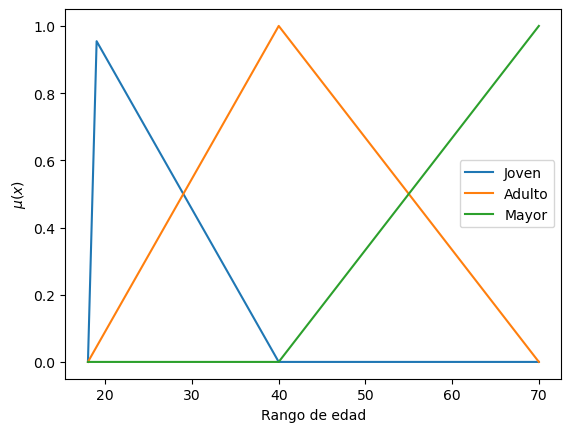

In [4]:
# Rango de edad

# Joven
joven = trimf(x_edad, [18, 18, 40])

# Adulto
adulto = trimf(x_edad, [18, 40, 70])

# Mayor (5/0, 10/1, 10/0)
mayor = trimf(x_edad, [40, 70, 70])

# Representación gráfica
plt.plot(x_edad, joven, label="Joven")
plt.plot(x_edad, adulto, label="Adulto")
plt.plot(x_edad, mayor, label="Mayor")
plt.legend(loc='best')
plt.xlabel('Rango de edad')
plt.ylabel('$\mu (x)$')
plt.show()

<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
C:\Users\alanm\AppData\Local\Temp\ipykernel_1368\3913897540.py:18: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mu (x)$')


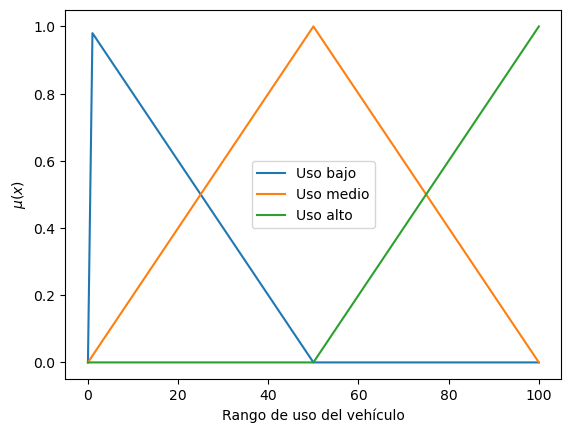

In [5]:
# Rango de uso

# Uso bajo
uso_b = trimf(x_uso, [0, 0, 50])

# Uso medio
uso_m = trimf(x_uso, [0, 50, 100])

# Uso alto (5/0, 10/1, 10/0)
uso_a = trimf(x_uso, [50, 100, 100])

# Representación gráfica
plt.plot(x_uso, uso_b, label="Uso bajo")
plt.plot(x_uso, uso_m, label="Uso medio")
plt.plot(x_uso, uso_a, label="Uso alto")
plt.legend(loc='best')
plt.xlabel('Rango de uso del vehículo')
plt.ylabel('$\mu (x)$')
plt.show()

<>:27: SyntaxWarning: invalid escape sequence '\m'
<>:27: SyntaxWarning: invalid escape sequence '\m'
C:\Users\alanm\AppData\Local\Temp\ipykernel_1368\3422146435.py:27: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mu (x)$')


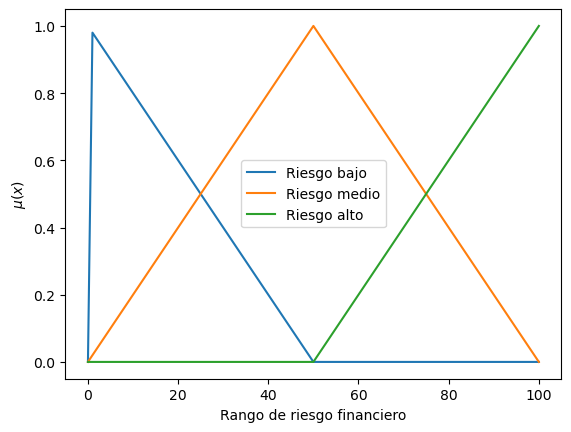

In [6]:
# Rango de riesgo

# # Riesgo bajo
# riesgo_b = trimf(x_riesgo, [0, 0, 35])

# # Riesgo medio
# riesgo_m = trimf(x_riesgo, [20, 50, 80])

# # Riesgo alto (5/0, 10/1, 10/0)
# riesgo_a = trimf(x_riesgo, [65, 100, 100])

# Riesgo bajo
riesgo_b = trimf(x_riesgo, [0, 0, 50])

# Riesgo medio
riesgo_m = trimf(x_riesgo, [0, 50, 100])

# Riesgo alto (5/0, 10/1, 10/0)
riesgo_a = trimf(x_riesgo, [50, 100, 100])

# Representación gráfica
plt.plot(x_riesgo, riesgo_b, label="Riesgo bajo")
plt.plot(x_riesgo, riesgo_m, label="Riesgo medio")
plt.plot(x_riesgo, riesgo_a, label="Riesgo alto")
plt.legend(loc='best')
plt.xlabel('Rango de riesgo financiero')
plt.ylabel('$\mu (x)$')
plt.show()

<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:45: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:45: SyntaxWarning: invalid escape sequence '\m'
C:\Users\alanm\AppData\Local\Temp\ipykernel_1368\1882129763.py:24: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mu (x)$')
C:\Users\alanm\AppData\Local\Temp\ipykernel_1368\1882129763.py:45: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mu (x)$')


Edad joven: 0.6818181818181818
Edad adulto: 0.3181818181818182
Edad mayor: 0.0


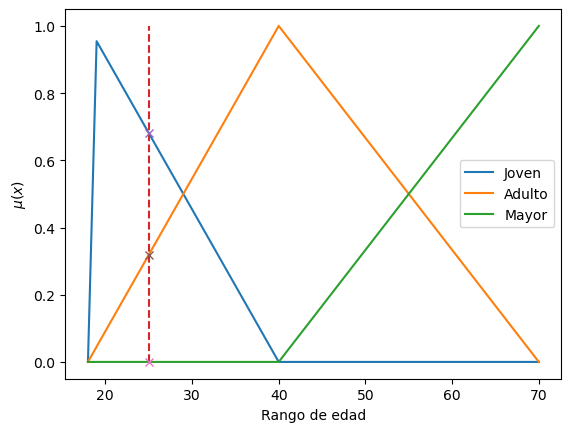


Uso bajo: 0.0
Uso medio: 1.0
Uso alto: 0.0


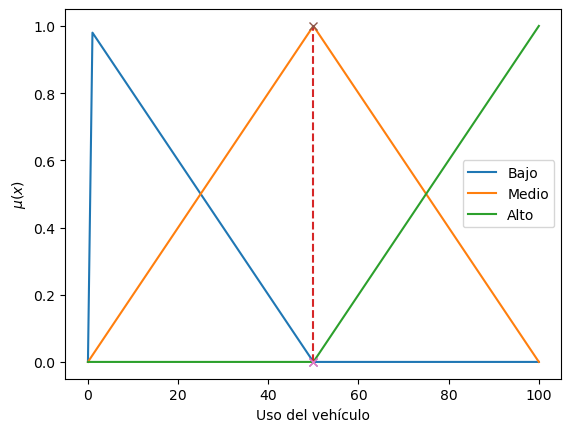

In [7]:
# Valores para las variables de entrada
edad_persona = 25
uso_vehiculo = 50

# Calculamos el grado de membresía de cierto valor de entrada para las variables 'calidad de comida' y 'calidad del servicio'

edad_joven = trimf(edad_persona, [18, 18, 40])
edad_adulto = trimf(edad_persona, [18, 40, 70])
edad_mayor = trimf(edad_persona, [40, 70, 70])

print("Edad joven:", edad_joven)
print("Edad adulto:", edad_adulto)
print("Edad mayor:", edad_mayor)

plt.plot(x_edad, joven, label="Joven")
plt.plot(x_edad, adulto, label="Adulto")
plt.plot(x_edad, mayor, label="Mayor")
plt.plot([edad_persona, edad_persona], [0.0, 1.0], linestyle="--")
plt.plot(edad_persona, edad_joven, 'x')
plt.plot(edad_persona, edad_adulto, 'x')
plt.plot(edad_persona, edad_mayor, 'x')
plt.legend(loc='best')
plt.xlabel('Rango de edad')
plt.ylabel('$\mu (x)$')
plt.show()


uso_bajo = trimf(uso_vehiculo, [0, 0, 50])
uso_medio = trimf(uso_vehiculo, [0, 50, 100])
uso_alto = trimf(uso_vehiculo, [50, 100, 100])

print("\nUso bajo:", uso_bajo)
print("Uso medio:", uso_medio)
print("Uso alto:", uso_alto)

plt.plot(x_uso, uso_b, label="Bajo")
plt.plot(x_uso, uso_m, label="Medio")
plt.plot(x_uso, uso_a, label="Alto")
plt.plot([uso_vehiculo, uso_vehiculo], [0.0, 1.0], linestyle="--")
plt.plot(uso_vehiculo, uso_bajo, 'x')
plt.plot(uso_vehiculo, uso_medio, 'x')
plt.plot(uso_vehiculo, uso_alto, 'x')
plt.legend(loc='best')
plt.xlabel('Uso del vehículo')
plt.ylabel('$\mu (x)$')
plt.show()

In [8]:
# FUSIFICACIÓN

# Definición de reglas

# REGLA 1: El riesgo alto cuando edad es joven y el uso es medio.
antecedente_1 = min(edad_joven, uso_medio)
regla_1 = cut(antecedente_1, riesgo_a)

# REGLA 2: El riesgo medio cuando edad es adulto y el uso es medio.
antecedente_2 = min(edad_adulto, uso_medio)
regla_2 = cut(antecedente_2, riesgo_m)

# REGLA 3: El riesgo alto cuando edad es joven o el uso del vehículo es alto.
antecedente_3 = max(edad_joven, uso_alto)
regla_3 = cut(antecedente_3, riesgo_a)

# Se hace la unión de los conjuntos resultantes de la aplicación de reglas
agregacion = union([regla_1, regla_2, regla_3])
print(agregacion)


[0.         0.02       0.04       0.06       0.08       0.1
 0.12       0.14       0.16       0.18       0.2        0.22
 0.24       0.26       0.28       0.3        0.31818182 0.31818182
 0.31818182 0.31818182 0.31818182 0.31818182 0.31818182 0.31818182
 0.31818182 0.31818182 0.31818182 0.31818182 0.31818182 0.31818182
 0.31818182 0.31818182 0.31818182 0.31818182 0.31818182 0.31818182
 0.31818182 0.31818182 0.31818182 0.31818182 0.31818182 0.31818182
 0.31818182 0.31818182 0.31818182 0.31818182 0.31818182 0.31818182
 0.31818182 0.31818182 0.31818182 0.31818182 0.31818182 0.31818182
 0.31818182 0.31818182 0.31818182 0.31818182 0.31818182 0.31818182
 0.31818182 0.31818182 0.31818182 0.31818182 0.31818182 0.31818182
 0.32       0.34       0.36       0.38       0.4        0.42
 0.44       0.46       0.48       0.5        0.52       0.54
 0.56       0.58       0.6        0.62       0.64       0.66
 0.68       0.68181818 0.68181818 0.68181818 0.68181818 0.68181818
 0.68181818 0.68181818 0.6

In [9]:
# Defusificación usando el método del centroide
riesgo_centroid = defuzz(x_riesgo, agregacion, 'centroid')

print(f"Para una edad de {edad_persona} y un uso del vehículo de {uso_vehiculo}%,")
print(f"El riesgo financiero es de {riesgo_centroid:.2f}%")

Para una edad de 25 y un uso del vehículo de 50%,
El riesgo financiero es de 62.04%


In [10]:
# Defusificación usando el método bisector
riesgo_bisector = defuzz(x_riesgo, agregacion, 'bisector')

print(f"Para una edad de {edad_persona} y un uso del vehículo de {uso_vehiculo}%,")
print(f"El riesgo financiero es de {riesgo_bisector:.2f}%")

Para una edad de 25 y un uso del vehículo de 50%,
El riesgo financiero es de 68.00%


In [11]:
# Defusificación usando el método MOM
riesgo_mom = defuzz(x_riesgo, agregacion, 'MOM')

print(f"Para una edad de {edad_persona} y un uso del vehículo de {uso_vehiculo}%,")
print(f"El riesgo financiero es de {riesgo_mom:.2f}%")

Para una edad de 25 y un uso del vehículo de 50%,
El riesgo financiero es de 92.50%


In [12]:
# Defusificación usando el método SOM
riesgo_som = defuzz(x_riesgo, agregacion, 'SOM')

print(f"Para una edad de {edad_persona} y un uso del vehículo de {uso_vehiculo}%,")
print(f"El riesgo financiero es de {riesgo_som:.2f}%")

Para una edad de 25 y un uso del vehículo de 50%,
El riesgo financiero es de 85.00%


In [13]:
# Defusificación usando el método LOM
riesgo_lom = defuzz(x_riesgo, agregacion, 'LOM')

print(f"Para una edad de {edad_persona} y un uso del vehículo de {uso_vehiculo}%,")
print(f"El riesgo financiero es de {riesgo_lom:.2f}%")

Para una edad de 25 y un uso del vehículo de 50%,
El riesgo financiero es de 100.00%


In [14]:
print('Riesgo centroid = ', riesgo_centroid)
print('Riesgo bisector = ', riesgo_bisector)
print('Riesgo MOM = ', riesgo_mom)
print('Riesgo SOM = ', riesgo_som)
print('Riesgo LOM = ', riesgo_lom)

Riesgo centroid =  62.040854660718495
Riesgo bisector =  68
Riesgo MOM =  92.5
Riesgo SOM =  85
Riesgo LOM =  100


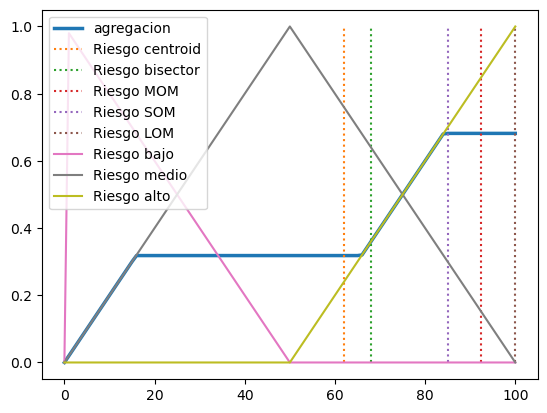

In [15]:
# Representación gráfica

plt.plot(x_riesgo, agregacion, linewidth=2.5, linestyle="-", label="agregacion")
plt.plot([riesgo_centroid, riesgo_centroid], [0, 1], linestyle=":", label="Riesgo centroid")
plt.plot([riesgo_bisector, riesgo_bisector], [0, 1], linestyle=":", label="Riesgo bisector")
plt.plot([riesgo_mom, riesgo_mom], [0, 1], linestyle=":", label="Riesgo MOM")
plt.plot([riesgo_som, riesgo_som], [0, 1], linestyle=":", label="Riesgo SOM")
plt.plot([riesgo_lom, riesgo_lom], [0, 1], linestyle=":", label="Riesgo LOM")
plt.plot(x_riesgo, riesgo_b, label="Riesgo bajo")
plt.plot(x_riesgo, riesgo_m, label="Riesgo medio")
plt.plot(x_riesgo, riesgo_a, label="Riesgo alto")
plt.legend(loc='best')
plt.show()

In [16]:
# En este caso, creo que los métodos bisector y centroid son los más coherentes con los datos de 
# entrada, mientras que los métodos MOM, SOM y LOM no se ajustan tanto, siendo SOM el más coherente
# de esos tres. El más coherente para mí sería el bisector.
